In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [2]:
headers = ["sepal length(cm)", "sepal width(cm)", "petal length(cm)", "petal width(cm)", "class"]

df = pd.read_csv("datasets/Iris/iris.csv", names=headers, header=None)

In [3]:
df

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal length(cm)  150 non-null    float64
 1   sepal width(cm)   150 non-null    float64
 2   petal length(cm)  150 non-null    float64
 3   petal width(cm)   150 non-null    float64
 4   class             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal length(cm)    0
sepal width(cm)     0
petal length(cm)    0
petal width(cm)     0
class               0
dtype: int64

<h3>2. Error correction (Outlier detection and removal)</h3>

In [7]:
cols = ["sepal length(cm)", "sepal width(cm)", "petal length(cm)", "petal width(cm)"]

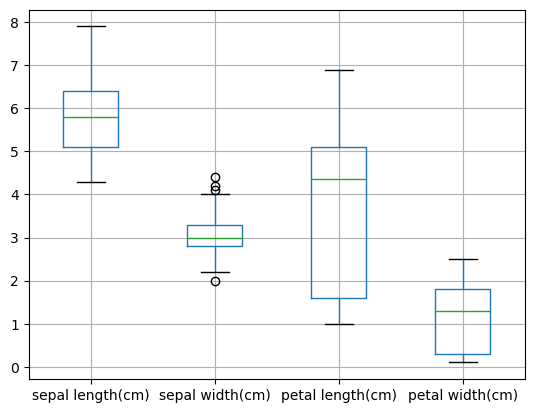

In [8]:
plt.figsize=(18,18)
df[cols].boxplot()
plt.show()

In [9]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75, 25])
    IQR = Q75 - Q25
    print(f"Q25: {Q25}")
    print(f"Q75: {Q75}")
    print(f"Inter Quartile Range: {IQR}")
    print(f"Outliers lie before {Q25-1.5*IQR} and beyond {Q75+1.5*IQR}")
    print(f"No of rows with left extreme outliers: {len(df[df_column < Q25-1.5*IQR])}")
    print(f"No of rows with right extreme outliers: {len(df[df_column > Q75+1.5*IQR])}")    

In [10]:
outliers_graph(df['sepal length(cm)'])

Q25: 5.1
Q75: 6.4
Inter Quartile Range: 1.3000000000000007
Outliers lie before 3.1499999999999986 and beyond 8.350000000000001
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 0


In [11]:
outliers_graph(df['sepal width(cm)'])

Q25: 2.8
Q75: 3.3
Inter Quartile Range: 0.5
Outliers lie before 2.05 and beyond 4.05
No of rows with left extreme outliers: 1
No of rows with right extreme outliers: 3


In [12]:
df = df[((df['sepal width(cm)'] >= 2.05) & (df['sepal width(cm)'] <= 4.05))]

In [13]:
outliers_graph(df['petal length(cm)'])

Q25: 1.6
Q75: 5.1
Inter Quartile Range: 3.4999999999999996
Outliers lie before -3.649999999999999 and beyond 10.349999999999998
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 0


In [14]:
outliers_graph(df['petal width(cm)'])

Q25: 0.3
Q75: 1.8
Inter Quartile Range: 1.5
Outliers lie before -1.95 and beyond 4.05
No of rows with left extreme outliers: 0
No of rows with right extreme outliers: 0


<h3>4. Model Building</h3>

In [15]:
x = df.drop(['sepal length(cm)', 'class'], axis=1)
y = df['sepal length(cm)']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

<h4>1. Linear Regression (predict sepal length)</h4>

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
print(f"Regression Score: {lr.score(x_test, y_test)}")

Regression Score: 0.8911380705225486


In [19]:
y_pred = lr.predict(x_test)

In [20]:
y_pred

array([6.68495817, 5.44509685, 5.93484031, 4.90151302, 4.62362665,
       5.11683017, 6.5658732 , 6.92611383, 6.00120761, 5.1198979 ,
       4.74198127, 5.58591193, 7.02023694, 4.76717142, 4.82974063,
       5.99813988, 5.2855651 , 5.69813109, 6.71482306, 6.50733037,
       5.01753026, 5.18553483, 6.10495395, 5.00154328, 5.16414276,
       6.30259511, 4.88245831, 6.08727795, 5.70491489, 4.69233131,
       7.91485823, 7.21013564, 7.14134897, 5.94607055, 5.57364102,
       6.17672633, 5.51073378, 5.04812551, 5.26344267, 6.44138313,
       4.53586729, 5.17027821, 6.06684454, 6.31244663])

In [21]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.20856780952029516
MSE: 0.07664588337439551
RMSE: 0.2768499293378915


<h4>2. Naïve Bayes</h4>

In [25]:
x1 = df.drop('class', axis=1)
y1 = df['class']
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=4)

In [26]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [33]:
y_pred = nb.predict(x_test) 
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

In [34]:
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
accuracy_nb

97.73

In [35]:
acc_gaussian = round(nb.score(x_train, y_train) * 100, 2)
acc_gaussian

95.1